# Basic Optical Fiber Metrics

**Scott Prahl**

**20 Jan 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber
except:
    print("***** You need to install the ofiber module first           *****")
    print("***** Execute the following line in a new cell, then retry *****")
    print()
    print("!{sys.executable} -m pip install ofiber")

## The relative refractive index or $\Delta$

Compare result with an approximation.

In [2]:
help(ofiber.relative_refractive_index)

Help on function relative_refractive_index in module ofiber.basics:

relative_refractive_index(n_core, n_clad)
    Calculate the relative refractive index (Delta) for an optical fiber.
    
    Args:
        n_core :  the index of refraction of the fiber core      [-]
        n_clad:  the index of refraction of the fiber cladding   [-]
    
    Returns:
        the relative refractive index (Delta)                    [-]



In [3]:
d=3e-6 #m
n2= 1.48
n1 = 1.5
Delta = (n1-n2)/n1
print("Delta = %.5f (approximation)"%Delta)
Delta = ofiber.relative_refractive_index(n1,n2)  #exact
print("Delta = %.5f"%Delta)

Delta = 0.01333 (approximation)
Delta = 0.01324


## Numerical Aperture of a step index fiber

A convenience method to find the numerical aperture given the core and cladding index.

In [4]:
help(ofiber.numerical_aperture)

Help on function numerical_aperture in module ofiber.basics:

numerical_aperture(n_core, n_clad)
    Calculate the numerical aperture of an optical fiber.
    
    Args:
        n_core : the index of refraction of the fiber core      [-]
        n_clad : the index of refraction of the fiber cladding  [-]
    
    Returns:
        numerical aperture                                      [-]



In [5]:
d=3e-6 #m
n2= 1.48
n1 = 1.5
Delta = (n1-n2)/n1

NA = n1*np.sqrt(2*Delta)
print("NA    = %.4f (approximation)"%NA)
NA = ofiber.numerical_aperture(n1,n2)
print("NA    = %.4f"%NA)

NA    = 0.2449 (approximation)
NA    = 0.2441


We can easily make plots.  Here is the variation of the exact numerical aperture and that obtained with the approximation to $\Delta$

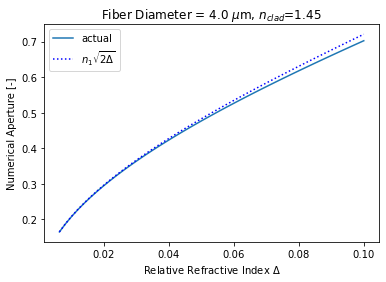

In [6]:
a=2e-6
n2= 1.45
Delta = np.linspace(0.0064,0.1,50)
n1 = n2/(1-Delta)
NA = ofiber.numerical_aperture(n1,n2)

plt.plot(Delta,NA,label='actual')
plt.plot(Delta,n1*np.sqrt(2*Delta),':b',label=r'$n_1\sqrt{2\Delta}$')
plt.xlabel(r'Relative Refractive Index $\Delta$ ')
plt.ylabel('Numerical Aperture [-]')
plt.title(r'Fiber Diameter = %.1f $\mu$m, $n_{clad}$=%.2f'%(2*a*1e6,n2))

plt.legend()
plt.show()

## The V-parameter for a fiber

This helps characterize the number of modes in a fiber.  If $V\gg 2.4$ then the number of modes is 
$$
N \approx \frac{V^2}{2}
$$

In [7]:
help(ofiber.V_parameter)

Help on function V_parameter in module ofiber.basics:

V_parameter(a, NA, lambda0)
    Calculate the V-parameter for an optical fiber.
    
    Args:
        a :       radius of the fiber              [m]
        NA :      numerical aperture of the fiber  [-]
        lambda0 : wavelength in vacuum             [m]
    
    Returns:
        V-parameter                                [-]



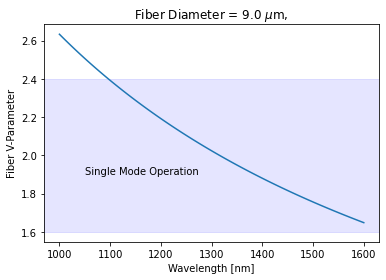

In [8]:
d=9e-6                                    # m
lambda0 = np.linspace(1000,1600,100)*1e-9 # m

clad = ofiber.doped_glass(0)     # pure SiO2
nclad = ofiber.n(clad,lambda0)

core = ofiber.doped_glass(0.02)  # 2% GeO2
ncore = ofiber.n(core,lambda0)

NA = ofiber.numerical_aperture(ncore,nclad)
V = ofiber.V_parameter(d/2,NA,lambda0)

plt.plot(lambda0*1e9,V)
plt.axhspan(1.6,2.4,color='blue',alpha=0.1)
plt.ylabel(r'Fiber V-Parameter')
plt.xlabel('Wavelength [nm]')
plt.title(r'Fiber Diameter = %.1f $\mu$m,'%(d*1e6))
plt.text(1050, 1.9, "Single Mode Operation")
plt.show()

## The cutoff wavelength for a fiber

In [9]:
help(ofiber.cutoff_wavelength)

Help on function cutoff_wavelength in module ofiber.basics:

cutoff_wavelength(a, NA, ell=0, q=inf)
    Calculate the cutoff wavelength for an optical fiber.
    
    The default operation is for this function to calculate the cutoff
    wavelength for the fundamental mode of a step-index fiber.  The cutoff
    wavelength for higher order modes may be found by specifying a different
    value of ell.
    
    If the cutoff wavelength for a graded index fiber is desired, then specify
    a different value for q.
    
    Args:
        a :   radius of the fiber                               [m]
        NA :  numerical aperture of the fiber                   [-]
        ell : (optional) mode number                            [-]
        q :   (optional) parameter for graded index fiber       [-]
    
    Returns:
        shortest wavelength for operation in the specified mode [m]



In [10]:
a      = 2e-6    # m
Delta  = 0.0064
n2     = 1.45
n1     = n2/(1-Delta)
NA     = n1*np.sqrt(2*Delta)
lambdac=ofiber.cutoff_wavelength(a,NA)

print("Cutoff wavelength is %.0f nm"%(lambdac*1e9))

Cutoff wavelength is 863 nm


### Example page 21 in Powers

The effect of a graded index fiber on the cutoff wavelength.

In [11]:
d=8e-6            # m
a=d/2             # m
lambda0 = 1300e-9 # m

n1 = 1.46
V = 2.1
NA = V/2/np.pi*lambda0/a

lambdac=ofiber.cutoff_wavelength(a,NA)
print("Cutoff wavelength is %.0f nm (step-index)"%(lambdac*1e9))

lambdac=ofiber.cutoff_wavelength(a,NA,q=2)
print("Cutoff wavelength is %.0f nm (parabolic fiber)"%(lambdac*1e9))

Cutoff wavelength is 1135 nm (step-index)
Cutoff wavelength is 803 nm (parabolic fiber)


Finally, how does the cutoff wavelength depend on the relative refractive index?

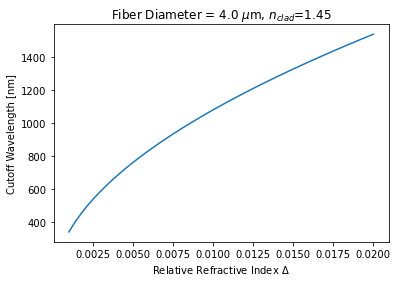

In [12]:
a=2e-6
n2= 1.45
Delta = np.linspace(0.001,0.02,50)

n1 = n2/(1-Delta)
NA = ofiber.numerical_aperture(n1,n2)
lambdac = ofiber.cutoff_wavelength(a,NA)

plt.plot(Delta,lambdac*1e9)
plt.xlabel(r'Relative Refractive Index $\Delta$ ')
plt.ylabel('Cutoff Wavelength [nm]')
plt.title(r'Fiber Diameter = %.1f $\mu$m, $n_{clad}$=%.2f'%(2*a*1e6,n2))
plt.show()